In [39]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect


# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("municipality_bus_utilization.csv")

In [5]:
data

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019
...,...,...,...,...
13065,2017-08-19 16:30:35,2,548,697
13066,2017-08-19 16:30:35,8,1193,2947
13067,2017-08-19 16:30:35,7,1354,2019
13068,2017-08-19 16:30:35,6,1680,3113


In [11]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [20]:
data["timestamp"]

0       2017-06-04 07:59:42
1       2017-06-04 07:59:42
2       2017-06-04 07:59:42
3       2017-06-04 07:59:42
4       2017-06-04 07:59:42
                ...        
13065   2017-08-19 16:30:35
13066   2017-08-19 16:30:35
13067   2017-08-19 16:30:35
13068   2017-08-19 16:30:35
13069   2017-08-19 16:30:35
Name: timestamp, Length: 13070, dtype: datetime64[ns]

In [27]:
data_train = data.loc[data["timestamp"] < "2017-08-05" ]

In [28]:
data_test = data.loc[data["timestamp"] >= "2017-08-05" ]

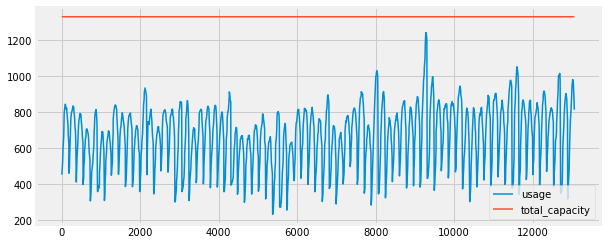

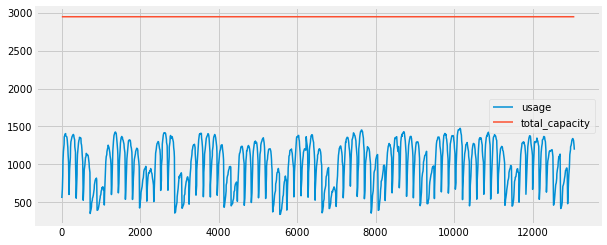

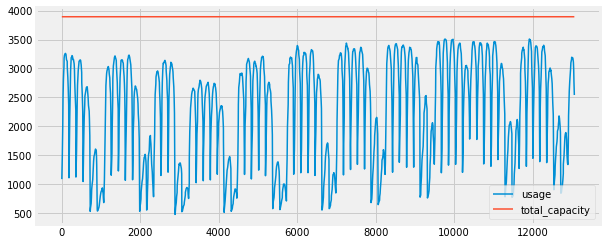

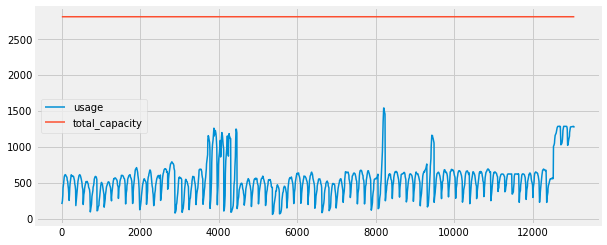

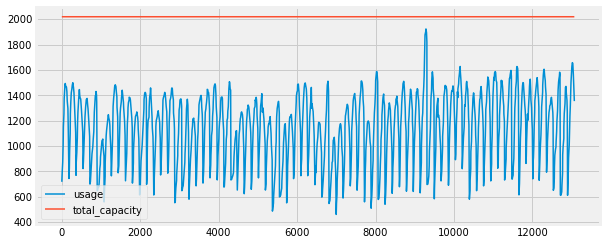

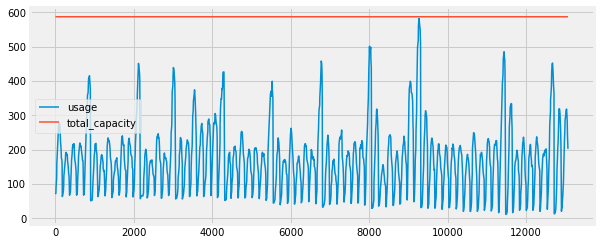

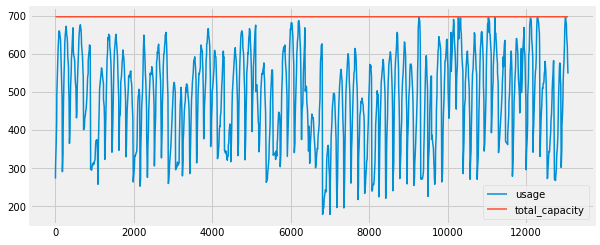

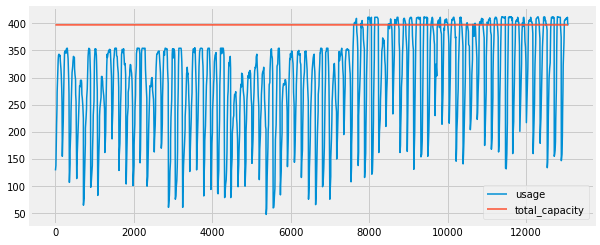

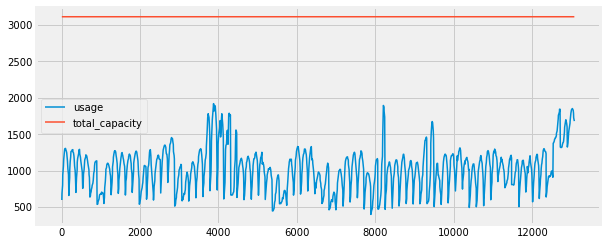

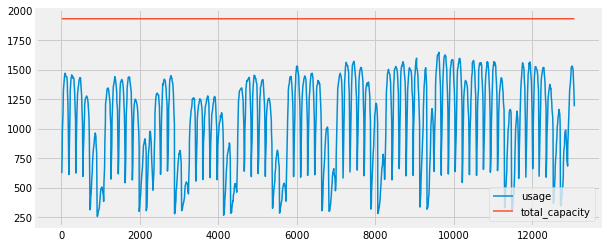

In [19]:
for id in data["municipality_id"].unique():
    df = data.loc[data["municipality_id"] == id]
    fig, ax=plt.subplots(figsize=(9, 4))
    df['usage'].plot(ax=ax, label='usage')
    df['total_capacity'].plot(ax=ax, label='total_capacity')
    ax.legend();

Test error (mse): 39504.43543507462
Test error (mse): 161761.88676268657
Test error (mse): 1842692.5512768659
Test error (mse): 125295.02054626867
Test error (mse): 129794.82186044774
Test error (mse): 15047.55779738806
Test error (mse): 24490.509617164174
Test error (mse): 13023.788780597015
Test error (mse): 110543.65878246269
Test error (mse): 291650.2511421642


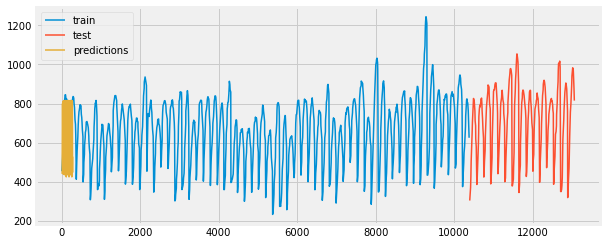

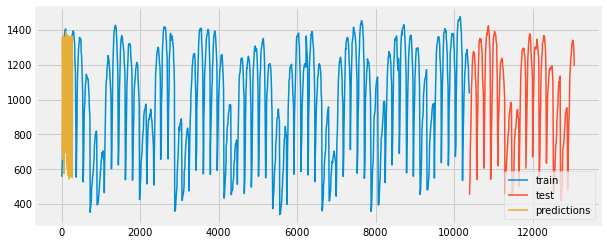

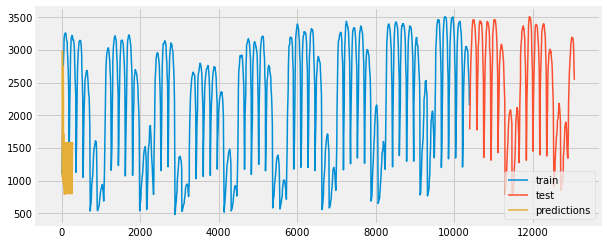

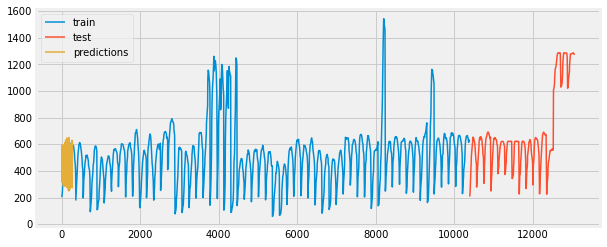

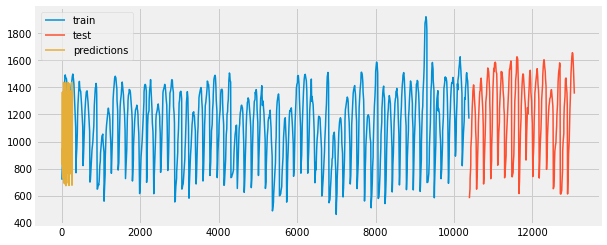

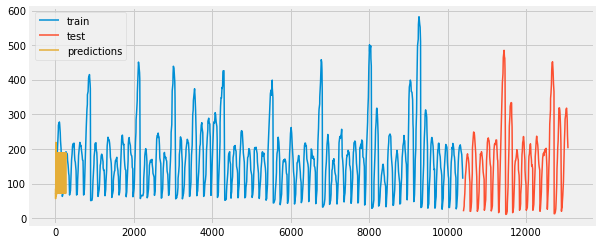

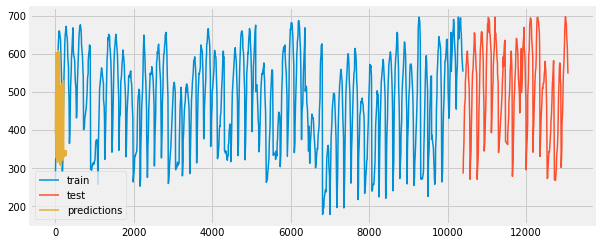

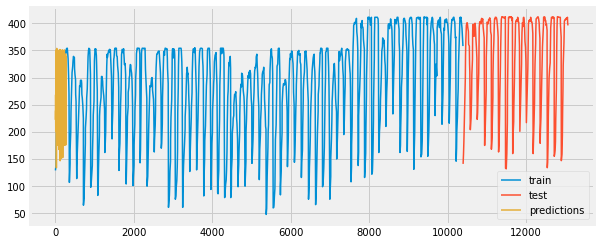

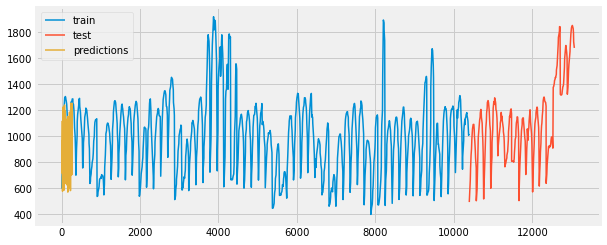

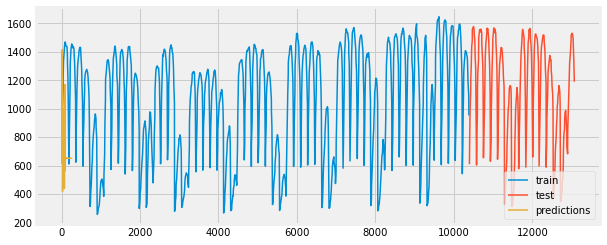

In [40]:
for id in data["municipality_id"].unique():
    df_train = data_train.loc[data_train["municipality_id"] == id]
    df_test = data_test.loc[data_test["municipality_id"] == id]
    forecaster = ForecasterAutoreg(
                    regressor = RandomForestRegressor(random_state=123),
                    lags      = 8
                 )

    forecaster.fit(y=df_train['usage'])
    predictions = forecaster.predict(steps = int(len(df_test)))
    fig, ax=plt.subplots(figsize=(9, 4))
    df_train['usage'].plot(ax=ax, label='train')
    df_test['usage'].plot(ax=ax, label='test')
    predictions.plot(ax=ax, label='predictions')
    ax.legend();
    
    error_mse = mean_squared_error(
                y_true = df_test['usage'],
                y_pred = predictions
            )

    print(f"Test error (mse): {error_mse}")